In [48]:
import pandas as pd
import numpy as np
import pickle
np.random.seed(0)

In [49]:
X_train = pd.read_csv('../data/Features/FeatureAnalysisSelections/wood_plastic/Train/dataset_5Features_modell-1.csv', sep=',')
X_test = pd.read_csv('../data/Features/FeatureAnalysisSelections/wood_plastic/Test/dataset_5Features_modell-1.csv', sep=',')
y_train = y_test_extracted_min = pd.read_csv('../data/Features/wood_plastic/features_zum_tranieren/wood_plastic_measurements_train.csv', sep=',')['material']
y_test = y_test_extracted_min = pd.read_csv('../data/Features/wood_plastic/features_zum_testen/wood_plastic_measurements_test.csv', sep=',')['material']

In [50]:
file_path_best = "../src/mldog/app/plugins/liveMaterialRecognition/materialDetection/old_pickleModel/bestModel.pkl"
with open(file_path_best, 'rb') as grid_search_file:
    model = pickle.load(grid_search_file)
model

Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=10, n_estimators=50))])

In [51]:
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score
score_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
score_pred = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Genauigkeit Training Score: {score_train}")
print(f"Genauigkeit Test Score: {score_pred}")

Genauigkeit Training Score: 1.0
Genauigkeit Test Score: 0.8


In [53]:
import matplotlib.pyplot as plt

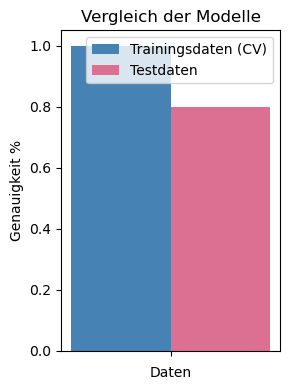

In [54]:
bar_width = 0.1
r1 = np.arange(1)
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(3, 4))
plt.bar(r1, score_train, color='steelblue', width=bar_width, label='Trainingsdaten (CV)')
plt.bar(r2, score_pred, color='palevioletred', width=bar_width, label='Testdaten')

plt.xlabel('Daten')
plt.ylabel('Genauigkeit %')
plt.title('Vergleich der Modelle')
plt.xticks([r + bar_width / 2 for r in range(1)], [""])
plt.legend()

plt.tight_layout()
plt.show()

Save the  Model:

In [55]:
file_path_best = "../src/mldog/app/plugins/liveMaterialRecognition/materialDetection/first_pickleModel/bestModel.pkl"
with open(file_path_best, 'wb') as grid_search_file:
    pickle.dump(model, grid_search_file)

In [56]:
with open(file_path_best, 'rb') as grid_search_file:
    model = pickle.load(grid_search_file)
model

Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=10, n_estimators=50))])